In [1]:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')

In [2]:
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [6]:
a = data['u']-data['g']
b = data['g']-data['r']
c = data['r']-data['i']
d = data['i']-data['z']
a.shape,b.shape,c.shape,d.shape

((50000,), (50000,), (50000,), (50000,))

In [7]:
x = np.stack((a,b,c,d),axis = 1)
x.shape

(50000, 4)

In [8]:
y = data['redshift']

In [21]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.3,random_state = 2529)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(x_tr,y_tr)
pred = dtr.predict(x_te)

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(y_te,pred)

0.08777676652531599

In [37]:
result = np.stack((y_te,pred),axis = 1)

In [38]:
result[:15]

array([[0.15192   , 0.1105108 ],
       [0.1342051 , 0.1449704 ],
       [0.09749297, 0.1176641 ],
       [1.64535   , 1.704385  ],
       [0.08397883, 0.09380625],
       [2.627389  , 2.510505  ],
       [0.2001595 , 0.2447272 ],
       [0.04631858, 0.0419107 ],
       [0.08273852, 0.0673248 ],
       [0.1206856 , 0.1350691 ],
       [0.06120427, 0.04020492],
       [0.1407404 , 0.1347144 ],
       [0.1464849 , 0.1195713 ],
       [0.03131332, 0.01855001],
       [0.1185632 , 0.1280776 ]])

In [39]:
np.median(np.abs(y_te-pred)), np.max(np.abs(y_te-pred)), np.min(np.abs(y_te-pred))

(0.021891119999999997, 5.978405700000001, 0.0)

In [2]:
from matplotlib import pyplot as plt

# Get a colour map
cmap = plt.get_cmap('YlOrRd')

# Define our colour indexes u-g and r-i
u_g = data['u'] - data['g']
r_i = data['r'] - data['i']

In [3]:
# Make a redshift array
redshift = data['redshift']

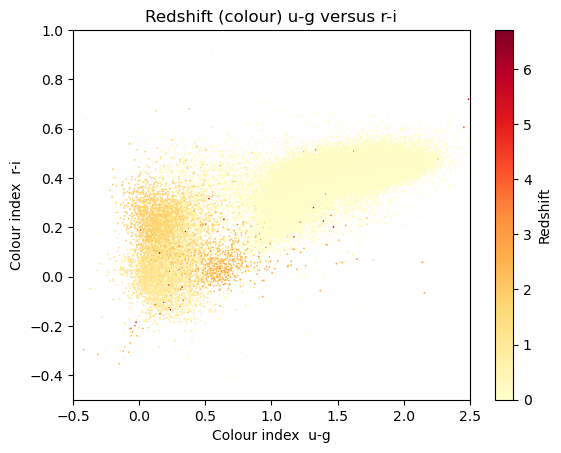

In [8]:
# Create the plot with plt.scatter
plot = plt.scatter(u_g, r_i, s=1.5, lw=0, c=redshift, cmap=cmap)

cb = plt.colorbar(plot)
cb.set_label('Redshift')

# Define your axis labels and plot title
plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()